# K-Means Clustering Algorithm Implementation

**Objective:** Implement K-Means Clustering from scratch and analyze how the number of clusters (K) affects clustering results and inertia.

**Student ID:** (Replace with your actual student ID for random seed)

---

## Algorithm Overview

K-Means is an unsupervised learning algorithm that partitions data into K clusters by:
1. Randomly initializing K cluster centers
2. Assigning each point to the nearest center
3. Updating centers as the mean of assigned points
4. Repeating until convergence

**Inertia:** Sum of squared distances from each point to its cluster center (lower is better)

## Step 1: Import Required Libraries

Using only:
- `numpy` for numerical operations
- `matplotlib` for visualization
- `random` for initialization

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

STUDENT_ID = 112310298  
random.seed(STUDENT_ID)
np.random.seed(STUDENT_ID)

print(f"Random seed set to: {STUDENT_ID}")

Random seed set to: 112310298


## Step 2: Load Dataset

Load the 2D data points from `dataset.txt` into a NumPy array

In [21]:
# Load all data points into a 2D array named Data
Data = np.loadtxt("dataset.txt")

print(f"Dataset loaded successfully!")
print(f"Shape: {Data.shape}")
print(f"Number of data points: {len(Data)}")
print(f"\nFirst 5 data points:")
print(Data[:5])

Dataset loaded successfully!
Shape: (373, 2)
Number of data points: 373

First 5 data points:
[[0.00246609 0.58232932]
 [0.         0.50803213]
 [0.06288533 0.50200803]
 [0.11097411 0.45180723]
 [0.10234279 0.51004016]]


## Step 3: Implement K-Means Algorithm

### Helper Functions

In [22]:
def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.
    
    Args:
        point1: First point (numpy array)
        point2: Second point (numpy array)
    
    Returns:
        Distance between the two points
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))


def initialize_centers(data, k):
    """
    Randomly select K points from data as initial cluster centers.
    
    Args:
        data: Dataset (numpy array)
        k: Number of clusters
    
    Returns:
        Initial cluster centers (numpy array)
    """
    # Randomly select K indices without replacement
    indices = random.sample(range(len(data)), k)
    centers = data[indices].copy()
    return centers


def assign_clusters(data, centers):
    """
    Assign each data point to the nearest cluster center.
    
    Args:
        data: Dataset (numpy array)
        centers: Cluster centers (numpy array)
    
    Returns:
        List of K sublists, where each sublist contains indices of points assigned to that cluster
    """
    k = len(centers)
    clusters = [[] for _ in range(k)]  # Initialize empty list with K sublists
    
    # For each point in Data
    for idx, point in enumerate(data):
        # Compute distance from each cluster center
        distances = [euclidean_distance(point, center) for center in centers]
        
        # Assign the point to the cluster with minimum distance
        closest_cluster = np.argmin(distances)
        clusters[closest_cluster].append(idx)
    
    return clusters


def update_centers(data, clusters):
    """
    Update cluster centers as the mean of their assigned points.
    
    Args:
        data: Dataset (numpy array)
        clusters: List of K sublists with point indices
    
    Returns:
        New cluster centers (numpy array)
    """
    new_centers = []
    
    # For each cluster
    for cluster in clusters:
        if len(cluster) > 0:
            # Update center as the mean of its points
            cluster_points = data[cluster]
            new_center = np.mean(cluster_points, axis=0)
        else:
            # If cluster is empty, keep the old center or reinitialize
            new_center = data[random.randint(0, len(data) - 1)]
        
        new_centers.append(new_center)
    
    return np.array(new_centers)


def has_converged(old_centers, new_centers, tolerance=1e-6):
    """
    Check if centers have changed very little (convergence).
    
    Args:
        old_centers: Previous cluster centers
        new_centers: Updated cluster centers
        tolerance: Threshold for convergence
    
    Returns:
        True if converged, False otherwise
    """
    # Check if the centers have changed very little
    distances = [euclidean_distance(old, new) for old, new in zip(old_centers, new_centers)]
    max_change = max(distances)
    
    return max_change < tolerance


def calculate_inertia(data, clusters, centers):
    """
    Compute inertia: sum of squared distances from each point to its cluster center.
    
    Args:
        data: Dataset (numpy array)
        clusters: List of K sublists with point indices
        centers: Cluster centers (numpy array)
    
    Returns:
        Inertia value
    """
    inertia = 0.0
    
    # For each cluster
    for cluster_idx, cluster in enumerate(clusters):
        center = centers[cluster_idx]
        
        # Sum squared distances from each point to its cluster center
        for point_idx in cluster:
            point = data[point_idx]
            distance = euclidean_distance(point, center)
            inertia += distance ** 2
    
    return inertia


print("Helper functions defined successfully!")

Helper functions defined successfully!


### Main K-Means Algorithm

In [23]:
def kmeans(data, k, max_iterations=100, tolerance=1e-6):
    """
    K-Means Clustering Algorithm.
    
    Args:
        data: Dataset (numpy array)
        k: Number of clusters
        max_iterations: Maximum number of iterations
        tolerance: Convergence threshold
    
    Returns:
        clusters: Final cluster assignments
        centers: Final cluster centers
        inertia: Final inertia value
        iterations: Number of iterations taken
    """
    # Step 3: Randomly select K points from Data as initial cluster centers
    centers = initialize_centers(data, k)
    
    # Step 4: Initialize an empty list named Clusters containing K sublists
    clusters = [[] for _ in range(k)]
    
    # Step 5: Repeat until convergence
    for iteration in range(max_iterations):
        # Step 5a: Assign each point to nearest cluster
        clusters = assign_clusters(data, centers)
        
        # Step 5b: Update cluster centers
        new_centers = update_centers(data, clusters)
        
        # Step 5c: Check convergence
        if has_converged(centers, new_centers, tolerance):
            centers = new_centers
            print(f"Converged at iteration {iteration + 1}")
            break
        
        centers = new_centers
    else:
        print(f"Reached maximum iterations ({max_iterations})")
    
    # Step 6: Compute final inertia
    inertia = calculate_inertia(data, clusters, centers)
    
    return clusters, centers, inertia, iteration + 1


print("K-Means algorithm implemented successfully!")

K-Means algorithm implemented successfully!


## Step 4: Visualization Function

In [24]:
def plot_clusters(data, clusters, centers, k, inertia, iterations):
    """
    Plot the clustered data points with different colors.
    
    Args:
        data: Dataset (numpy array)
        clusters: List of K sublists with point indices
        centers: Cluster centers (numpy array)
        k: Number of clusters
        inertia: Inertia value
        iterations: Number of iterations taken
    """
    plt.figure(figsize=(10, 8))
    
    # Define colors for different clusters
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
    
    # Plot each cluster with a different color
    for cluster_idx, cluster in enumerate(clusters):
        if len(cluster) > 0:
            cluster_points = data[cluster]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                       c=colors[cluster_idx % len(colors)], 
                       label=f'Cluster {cluster_idx + 1}',
                       alpha=0.6, s=50)
    
    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], 
               c='black', marker='X', s=300, 
               edgecolors='white', linewidths=2,
               label='Centers', zorder=5)
    
    plt.title(f'K-Means Clustering (K={k})\nInertia: {inertia:.4f} | Iterations: {iterations}', 
             fontsize=14, fontweight='bold')
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


print("Visualization function defined successfully!")

Visualization function defined successfully!


## Step 5: Run K-Means for Different Values of K

Running K-Means for K = 2, 4, 6, 7 and recording results

Running K-Means for different values of K

K = 2
Converged at iteration 5
Final Inertia: 20.573932
Cluster sizes: [234, 139]


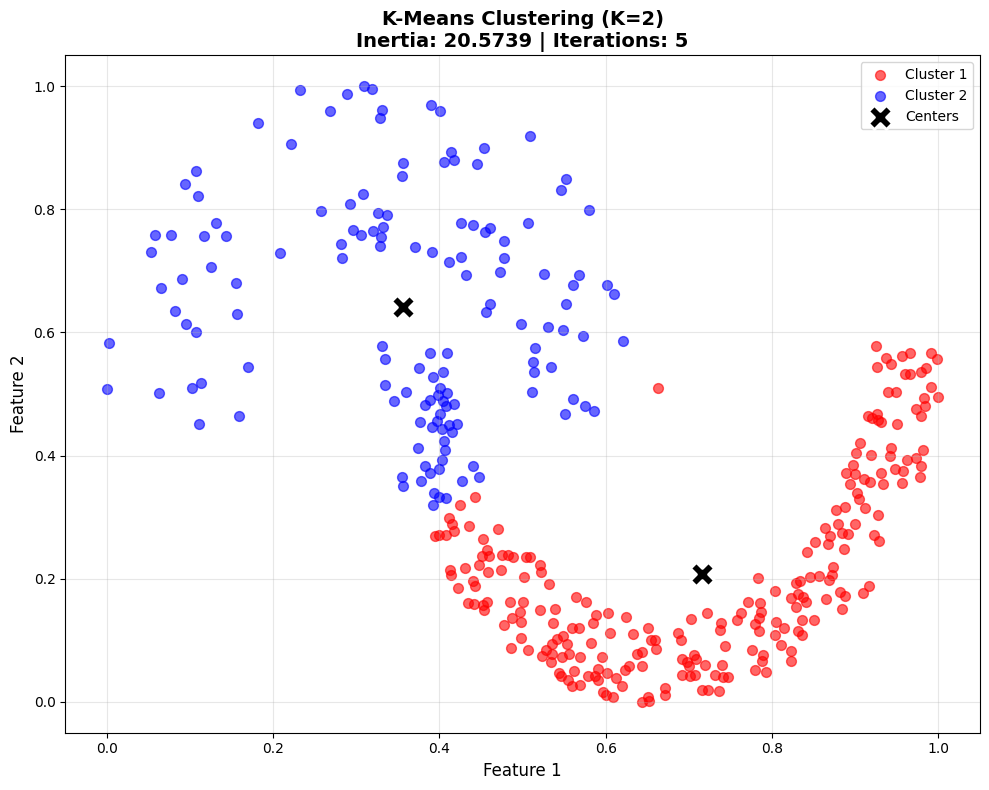


K = 4
Converged at iteration 12
Final Inertia: 8.497719
Cluster sizes: [141, 68, 81, 83]


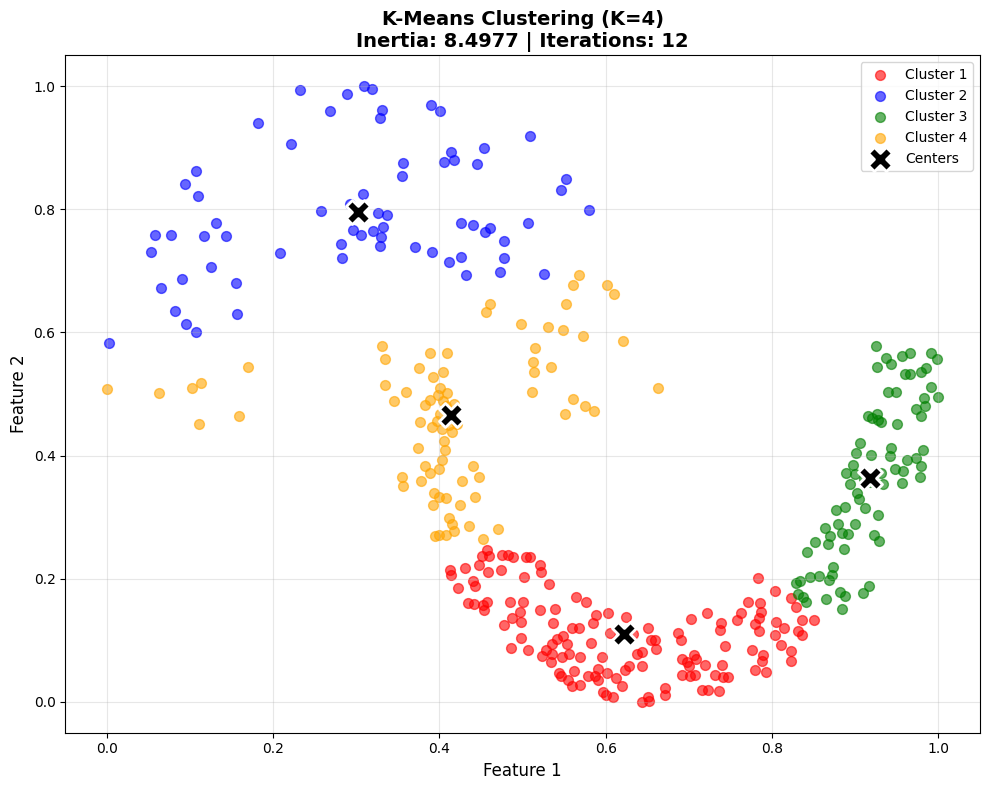


K = 6
Converged at iteration 17
Final Inertia: 5.341523
Cluster sizes: [79, 59, 56, 58, 68, 53]


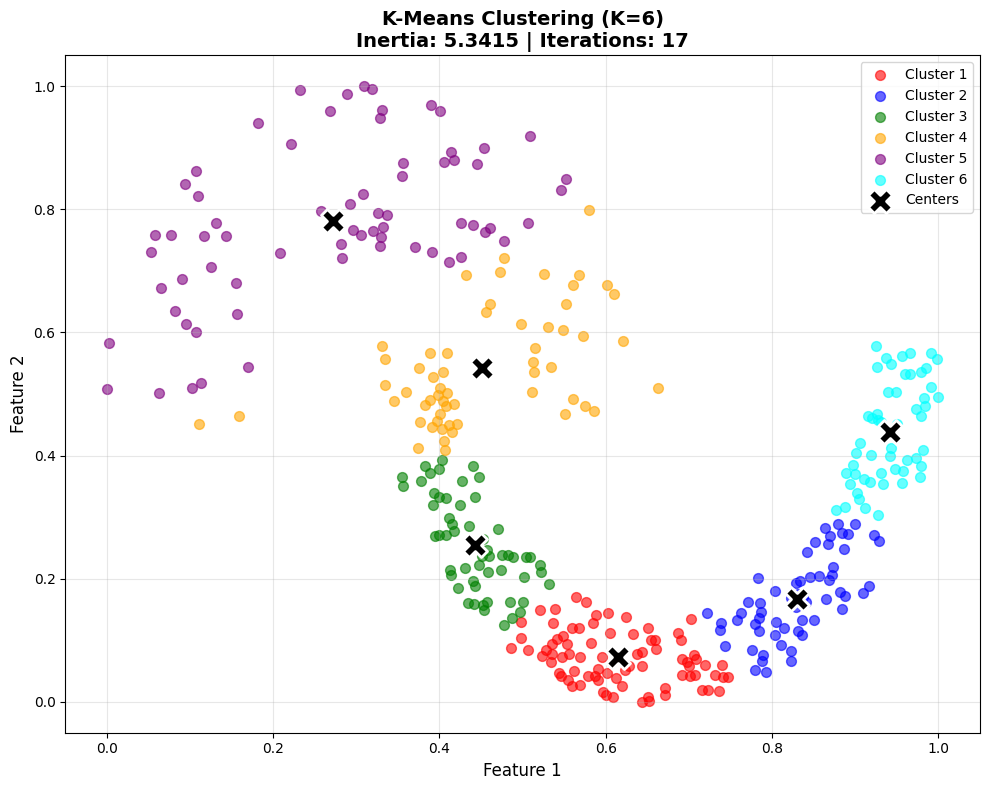


K = 7
Converged at iteration 20
Final Inertia: 3.656628
Cluster sizes: [56, 53, 26, 53, 59, 48, 78]


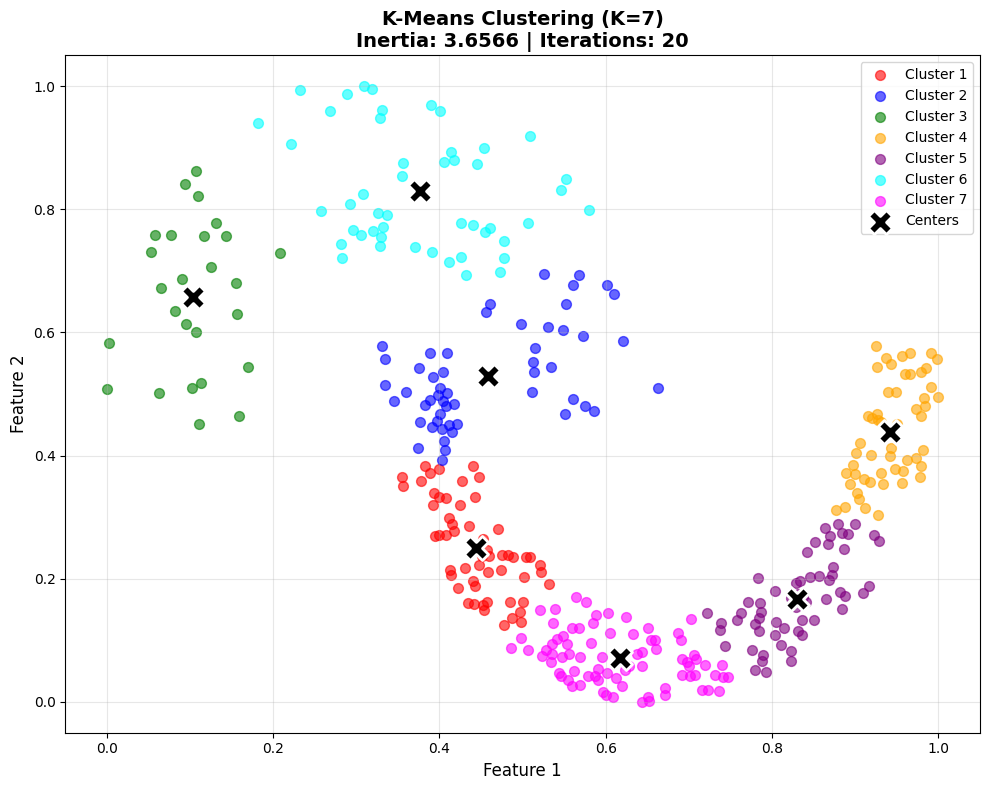


All K-Means runs completed!


In [25]:
# Values of K to test
k_values = [2, 4, 6, 7]

# Store results
results = {}

print("="*60)
print("Running K-Means for different values of K")
print("="*60)

for k in k_values:
    print(f"\n{'='*60}")
    print(f"K = {k}")
    print(f"{'='*60}")
    
    # Run K-Means
    clusters, centers, inertia, iterations = kmeans(Data, k)
    
    # Store results
    results[k] = {
        'clusters': clusters,
        'centers': centers,
        'inertia': inertia,
        'iterations': iterations
    }
    
    print(f"Final Inertia: {inertia:.6f}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    
    # Plot the results
    plot_clusters(Data, clusters, centers, k, inertia, iterations)

print("\n" + "="*60)
print("All K-Means runs completed!")
print("="*60)

## Step 6: Results Summary

### Table: K vs Inertia

In [26]:
# Create summary table
print("\n" + "="*60)
print("RESULTS SUMMARY: K vs Inertia")
print("="*60)
print(f"{'K':<10} {'Inertia':<20} {'Iterations':<15} {'Cluster Sizes'}")
print("-"*60)

for k in k_values:
    inertia = results[k]['inertia']
    iterations = results[k]['iterations']
    cluster_sizes = [len(cluster) for cluster in results[k]['clusters']]
    print(f"{k:<10} {inertia:<20.6f} {iterations:<15} {cluster_sizes}")

print("="*60)


RESULTS SUMMARY: K vs Inertia
K          Inertia              Iterations      Cluster Sizes
------------------------------------------------------------
2          20.573932            5               [234, 139]
4          8.497719             12              [141, 68, 81, 83]
6          5.341523             17              [79, 59, 56, 58, 68, 53]
7          3.656628             20              [56, 53, 26, 53, 59, 48, 78]


### Inertia vs K Plot

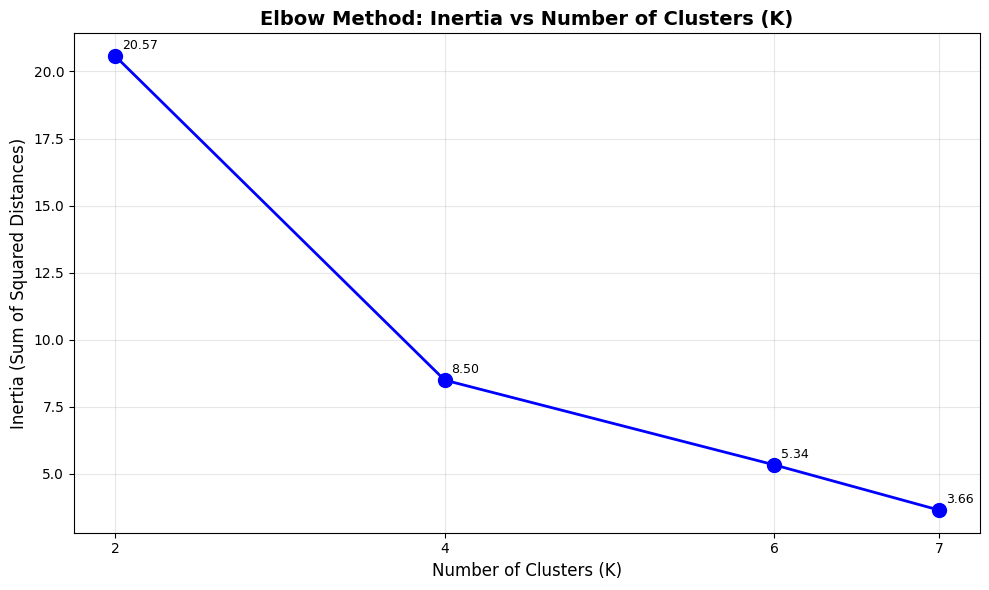

In [27]:
# Extract inertia values
inertias = [results[k]['inertia'] for k in k_values]

# Plot K vs Inertia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o', linewidth=2, markersize=10, color='blue')
plt.title('Elbow Method: Inertia vs Number of Clusters (K)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Annotate points with inertia values
for k, inertia in zip(k_values, inertias):
    plt.annotate(f'{inertia:.2f}', 
                xy=(k, inertia), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.tight_layout()
plt.show()

## Step 7: Analysis and Explanation

### How Inertia Changes with K

**Observations:**

1. **Decreasing Trend:** As K increases, the inertia generally decreases. This is expected because:
   - More clusters mean data points are closer to their cluster centers
   - Each cluster becomes smaller and more compact
   - The sum of squared distances (inertia) reduces

2. **Elbow Method:** The plot of K vs Inertia often shows an "elbow" shape:
   - At low K values, adding clusters significantly reduces inertia
   - After a certain point (the "elbow"), the reduction becomes less significant
   - The elbow point suggests the optimal number of clusters

3. **Trade-off:** While lower inertia is better:
   - Too few clusters (K too small): Underfitting, high inertia
   - Too many clusters (K too large): Overfitting, complexity without meaningful improvement
   - The optimal K balances model simplicity and inertia reduction

4. **Interpretation:**
   - Look for the K value where the rate of inertia decrease slows down
   - This indicates diminishing returns from adding more clusters
   - The elbow point represents the most efficient clustering

**Conclusion:**

Based on the results above, examine the K vs Inertia plot to identify the elbow point. This value of K provides a good balance between model complexity and clustering quality for this dataset.